# 모델의 선택과 확장

## 기본 라이브러리

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

## 교차검증

### 교차검증을 이용한 KNN 파라메터 튜닝

In [2]:
df = pd.read_csv('data02_iris_noisy.csv')
X = df.iloc[:,:-1]
Y = df['Species']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=0)

In [3]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
f = KNeighborsClassifier(3)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain) )
print( f.score(xtest,ytest) )

0.9
0.75


In [4]:
# parameter tunning
from sklearn.model_selection import cross_val_score
s = np.zeros((40,3))
for n in range(s.shape[0]):
    f = KNeighborsClassifier(n+1)
    f.fit(xtrain,ytrain)
    s[n,0] = f.score(xtrain,ytrain)
    s[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[n,2] = f.score(xtest,ytest)

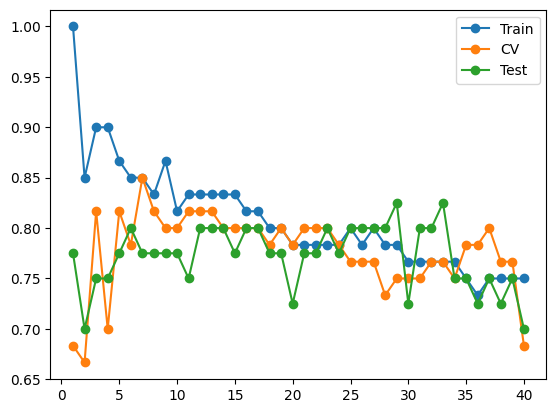

In [5]:
plt.plot(np.arange(1,41),s,marker='o')
plt.legend(('Train','CV','Test'))
plt.show()

In [6]:
# 최적의 K = 7
f = KNeighborsClassifier(7)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain) )
print( f.score(xtest,ytest) )

0.85
0.775


### 자동화된 파라메터 튜닝

In [7]:
# 파라메터 리스트트
params = {'n_neighbors': np.arange(2,40)}
params

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])}

In [8]:
from sklearn.model_selection import GridSearchCV
f = GridSearchCV(KNeighborsClassifier(),params)
f.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])})

In [9]:
f.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [10]:
f.best_params_

{'n_neighbors': 7}

In [11]:
print( f.score(xtrain,ytrain) )
print( f.score(xtest,ytest) )

0.85
0.775


## 변수 선택 기법

In [12]:
df = pd.read_csv('data03_carseat.csv')

In [13]:
X = df.iloc[:,2:-6]
X = pd.get_dummies(X,drop_first=True)
Y = df['Sales']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.9148283997074489 0.8707233967285173


In [15]:
# forward feature selection
np.random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
vn = list(xtrain.columns)
f_sel= []
score = []
for i in range(xtrain.shape[1]):
    s = np.zeros(len(vn))
    for j in range(len(vn)):
        v = f_sel.copy()
        v.append(vn[j])
        x = xtrain[v]
        f = LinearRegression()
        cv_score = cross_val_score(f,x,ytrain,cv=5)
        s[j] = cv_score.mean()
    v = vn[s.argmax()]
    f_sel.append(v)
    vn.remove(v)
    score.append(s.max())
    print("%02d Selected:"%i,f_sel)
    print("%02d Score   :"%i,np.round(10000*np.array(score))/10000)

00 Selected: ['ShelveLoc_Good']
00 Score   : [0.2564]
01 Selected: ['ShelveLoc_Good', 'Advertising']
01 Score   : [0.2564 0.3266]
02 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice']
02 Score   : [0.2564 0.3266 0.3983]
03 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price']
03 Score   : [0.2564 0.3266 0.3983 0.6895]
04 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price', 'Age']
04 Score   : [0.2564 0.3266 0.3983 0.6895 0.7501]
05 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price', 'Age', 'ShelveLoc_Medium']
05 Score   : [0.2564 0.3266 0.3983 0.6895 0.7501 0.7934]
06 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price', 'Age', 'ShelveLoc_Medium', 'Income']
06 Score   : [0.2564 0.3266 0.3983 0.6895 0.7501 0.7934 0.8054]
07 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price', 'Age', 'ShelveLoc_Medium', 'Income', 'Education']
07 Score   : [0.2564 0.3266 0.3983 0.6895 0.7501 0.7934 0.8054 0.8085]
08 Selected: ['ShelveLo

In [16]:
f_sel_final = f_sel[:-4]
f_sel_final

['ShelveLoc_Good',
 'Advertising',
 'CompPrice',
 'Price',
 'Age',
 'ShelveLoc_Medium',
 'Income']

In [17]:
f = LinearRegression()
f.fit(xtrain[f_sel_final],ytrain)
print( f.score(xtrain[f_sel_final],ytrain), f.score(xtest[f_sel_final],ytest) )

0.904573478781004 0.8968225971797077


## 차원축소 기법

In [159]:
df = pd.read_csv('data06_diabetes.csv')

In [171]:
X = df.iloc[:,:-1]
Y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.7,random_state=1)

### 데이터 스케일링

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [173]:
pd.DataFrame( {'mean': xtrain.mean(), 'var':xtrain.var()} )

,mean,var
age,-0.004111,0.002395
sex,0.004464,0.002287
bmi,-0.003242,0.002297
map,0.001441,0.002049
tc,0.000641,0.002417
ldl,0.000474,0.002289
hdl,0.001629,0.002321
tch,0.000013,0.002573
ltg,-0.002777,0.002581
glu,-0.000984,0.002369


In [174]:
xtrain_scaled = pd.DataFrame( scaler.transform(xtrain), columns=xtrain.columns )
pd.DataFrame( {'mean': xtrain_scaled.mean(), 'var':xtrain_scaled.var()} )

,mean,var
age,2.186803e-17,1.007634
sex,-4.710037e-17,1.007634
bmi,3.700743e-17,1.007634
map,4.037175e-17,1.007634
tc,2.691450e-17,1.007634
ldl,3.364312e-18,1.007634
hdl,-2.691450e-17,1.007634
tch,-6.728624e-17,1.007634
ltg,2.691450e-17,1.007634
glu,-4.373606e-17,1.007634


### PCA

In [175]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(xtrain_scaled)

PCA()

In [176]:
ztrain = pd.DataFrame( pca.transform(xtrain_scaled) )
ztrain.head()

,0,1,2,3,4,5,6,7,8,9
0,-3.837211,-0.660480,-1.505722,-0.148143,-0.954471,-1.159906,0.341996,0.149461,0.067290,-0.011754
1,-3.339579,0.369037,0.389494,1.190847,-0.241617,0.405073,-0.006366,-0.330110,0.118369,-0.005172
2,-2.462659,-1.132392,-0.432283,0.488887,-1.427379,0.525006,0.179123,0.453561,0.327735,-0.052969
3,2.121938,-0.862160,-2.089667,-0.706724,0.553903,-0.339686,-0.113312,-1.091882,-0.259699,-0.021148
4,0.705181,1.363594,0.680327,-0.771072,0.144636,-0.158288,-0.920641,0.437160,-0.234625,0.033060


In [177]:
pd.DataFrame( {'mean': ztrain.mean(), 'var':ztrain.var()} )

,mean,var
0,4.541821e-17,4.338396
1,-5.172630e-17,1.582158
2,-1.682156e-17,1.076919
3,2.523234e-17,0.868972
4,-2.397072e-17,0.650583
5,-3.196097e-17,0.594128
6,-1.261617e-17,0.454020
7,5.046468e-17,0.438675
8,1.892426e-18,0.064120
9,1.923966e-17,0.008365


### 데이터 변환

In [178]:
# 훈련 데이터의 변환
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)  # numpy 형식
xtrain_scaled = pd.DataFrame( xtrain_scaled  ) # pandas 형식
pca = PCA()
pca.fit(xtrain_scaled)
ztrain = pca.transform(xtrain_scaled) # numpy 형식
ztrain = pd.DataFrame( ztrain ) # pandas 형식

In [179]:
# 평가 데이터의 변환
ztest = pca.transform( scaler.transform(xtest) )
ztest = pd.DataFrame( ztest )

### 주성분 수에 따른 성능의 변화

In [180]:
npc = np.arange(1,ztrain.shape[1]+1)
train_r2 = []
cv_r2 = []
test_r2 = []
for n in npc:
  xx_train = ztrain.iloc[:,:n]
  xx_test = ztest.iloc[:,:n]
  f = LinearRegression()
  f.fit(xx_train,ytrain)
  train_r2.append( f.score(xx_train,ytrain) )
  cv_r2.append( cross_val_score(f,xx_train,ytrain,cv=3).mean() )
  test_r2.append( f.score(xx_test,ytest) )

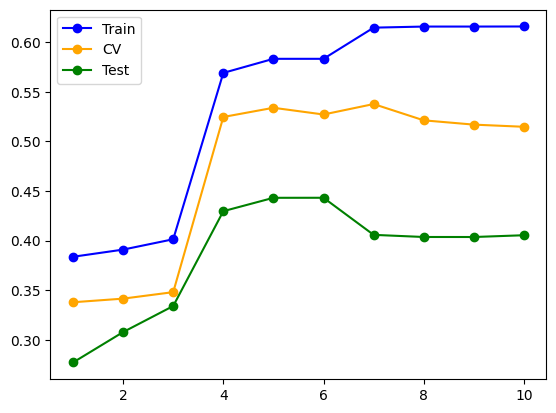

In [181]:
plt.plot(npc,train_r2,'blue',marker='o')
plt.plot(npc,cv_r2,'orange',marker='o')
plt.plot(npc,test_r2,'green',marker='o')
plt.legend(labels=['Train','CV','Test'])
plt.show()

## 규제화 기법

### 규제화 기법을 이용한 모델 변형

In [18]:
df = pd.read_csv('data03_carseat.csv')

In [19]:
X = df.iloc[:,2:-6]
X = pd.get_dummies(X,drop_first=True)
Y = df['Sales']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [20]:
# 일반적인 선형 회귀 모델델
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
print(f.coef_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[ 1.03595988e-01  1.79228444e-02  1.86839786e-01 -1.17723580e-03
 -9.30210503e-02 -5.32464044e-02 -6.37945582e-02  5.35942505e+00
  1.82442363e+00  2.83474765e-01 -6.21327031e-01]
0.9148283997074489 0.8707233967285173


In [21]:
# L2 규제화
from sklearn.linear_model import Ridge
f = Ridge(alpha=0.5)
f.fit(xtrain,ytrain)
print(f.coef_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[ 1.05075308e-01  1.88349645e-02  1.89502522e-01 -7.52171350e-04
 -9.07823252e-02 -4.91439435e-02 -6.19211208e-02  4.81393621e+00
  1.51919583e+00  1.18297462e-01 -6.03798539e-01]
0.911622866980691 0.8798418944193303


In [22]:
# L1 규제화
from sklearn.linear_model import Lasso
f = Lasso(alpha=0.5)
f.fit(xtrain,ytrain)
print(f.coef_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[ 1.14043241e-01  1.92695418e-02  1.71765280e-01  7.69098934e-04
 -7.62875403e-02 -2.44130681e-02 -0.00000000e+00  1.14779138e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
0.6990527820891633 0.6532997911656879


In [23]:
xtrain.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

### 규제화 기법에서의 파라메터 튜닝

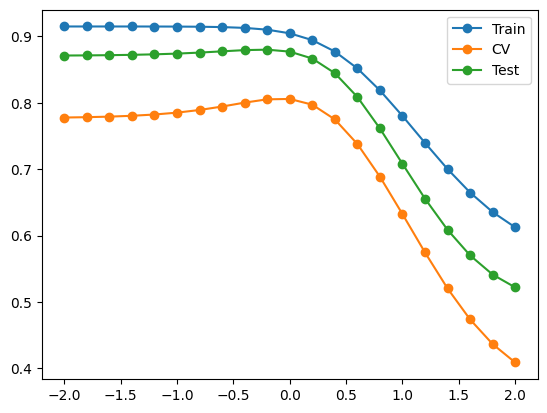

In [24]:
# select parameter using cross-validation
np.random.seed(0)
from sklearn.model_selection import cross_val_score
exp = np.linspace(-2,2,21)
alphas = 10**exp
s = np.zeros((len(alphas),3))
for n in range(s.shape[0]):
    f = Ridge(alpha=alphas[n])
    f.fit(xtrain,ytrain)
    s[n,0] = f.score(xtrain,ytrain)
    s[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[n,2] = f.score(xtest,ytest)

plt.plot(exp,s[:,0],exp,s[:,1],exp,s[:,2],marker='o')
plt.legend(('Train','CV','Test'))
plt.show()

In [25]:
params = {'alpha': 10**np.linspace(-2,2,21)}
f = GridSearchCV(Ridge(),params)
f.fit(xtrain,ytrain)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.58489319e-02, 2.51188643e-02, 3.98107171e-02,
       6.30957344e-02, 1.00000000e-01, 1.58489319e-01, 2.51188643e-01,
       3.98107171e-01, 6.30957344e-01, 1.00000000e+00, 1.58489319e+00,
       2.51188643e+00, 3.98107171e+00, 6.30957344e+00, 1.00000000e+01,
       1.58489319e+01, 2.51188643e+01, 3.98107171e+01, 6.30957344e+01,
       1.00000000e+02])})

In [26]:
print(f.best_estimator_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

Ridge()
0.9045558674746755 0.8769813900955272


In [27]:
params = {'alpha': 10**np.linspace(-2,2,21)}
f = GridSearchCV(Lasso(),params)
f.fit(xtrain,ytrain)
print(f.best_estimator_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

Lasso(alpha=0.039810717055349734)
0.9085954802530518 0.8814781926795952


In [28]:
f.best_estimator_.coef_

array([ 1.04044243e-01,  1.82885500e-02,  1.68838203e-01, -7.24964791e-04,
       -9.02660600e-02, -4.71140770e-02, -5.10239372e-02,  4.76987513e+00,
        1.39162376e+00,  0.00000000e+00, -2.76195583e-01])

## 연습문제

1. diabetes 데이터 셋에 KNN을 적용하였을 때 최적의 K값을 찾으시오. 그 때의 성능은 얼마인가?

In [31]:
df = pd.read_csv('data06_diabetes.csv')
X = df.iloc[:,:-1]
Y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

2. diabetes 데이터 셋에 Lasso를 적용하였을 때 최적의 alpha 값을 찾으시오. 그 때 선택된 변수는 어떤 것들인가? 그 때의 성능은 일반적인 선형회귀와 비교하여 얼마나 개선되었나?

In [32]:
df = pd.read_csv('data06_diabetes.csv')
X = df.iloc[:,:-1]
Y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

3. 아래의 코드는 당뇨 데이터 셋을 분류문제로 변경한 것이다. 여기에 로지스틱 회귀 모델을 적용하여 분류 모델을 만들고자 한다. 로지스틱 회귀 모델에서 사용되는 sklearn.linear_model.LogisticRegression에는 C라는 파라메터가 있는데, 이 파라메터의 사용법을 검색을 통해 알아보고, 튜닝하시오.

In [37]:
df = pd.read_csv('data06_diabetes.csv')
X = df.iloc[:,:-1]
Y_numeric = df['Y']
Y = [ 'Neg' if Y_numeric[i]<140 else 'Pos' for i in range(len(Y_numeric)) ]
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)